In [154]:
# %pip install --upgrade pip 
# %pip install nltk
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
# %pip install wordcloud
# %matplotlib inline 
# %pip install scikit-learn
# %pip install xgboost
# nltk.download('stopwords')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
from nltk.corpus import stopwords

In [155]:
data = pd.read_csv('data/spam2.csv', encoding = 'latin-1')
data.head()

,Unnamed: 0,FORMATTED_CONTENT,CLASS
0,0,a way for entrepreneurial students to share th...,0
1,1,Just back from the UK thanks positiveparents w...,1
2,2,Totally unexpected great night,1
3,3,bodysculpter hi will email u in the morning I ...,1
4,4,Hello world Welcome to Affordable Web Pro Blog...,0


In [156]:
data = data.iloc[:10000]
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         10000 non-null  int64 
 1   FORMATTED_CONTENT  10000 non-null  object
 2   CLASS              10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB
None


In [157]:
data.shape

(10000, 3)

In [158]:
data = data.drop(["Unnamed: 0"], axis=1)
data = data.rename(columns={"FORMATTED_CONTENT":"text", "CLASS":"label"})

In [159]:
data[1:10]

,text,label
1,Just back from the UK thanks positiveparents w...,1
2,Totally unexpected great night,1
3,bodysculpter hi will email u in the morning I ...,1
4,Hello world Welcome to Affordable Web Pro Blog...,0
5,Best Quit Smoking Philadelphia Pa NJ Hypnosis ...,1
6,Telular Corporation Reports Fourth Quarter and...,1
7,Reading Finde den Unterschied Zeit Online vs P...,1
8,Checking out RT joshuaziering Easy AB Split Te...,1
9,or,0


In [160]:
data = data.replace([1, 0], ['spam', 'ham'])

In [161]:
data[1:10]

,text,label
1,Just back from the UK thanks positiveparents w...,spam
2,Totally unexpected great night,spam
3,bodysculpter hi will email u in the morning I ...,spam
4,Hello world Welcome to Affordable Web Pro Blog...,ham
5,Best Quit Smoking Philadelphia Pa NJ Hypnosis ...,spam
6,Telular Corporation Reports Fourth Quarter and...,spam
7,Reading Finde den Unterschied Zeit Online vs P...,spam
8,Checking out RT joshuaziering Easy AB Split Te...,spam
9,or,ham


In [162]:
data['label'].value_counts()

label
ham     5167
spam    4833
Name: count, dtype: int64

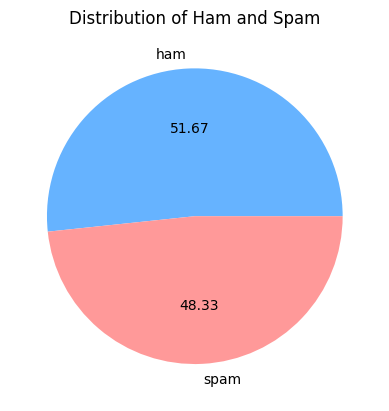

In [163]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(), labels=['ham', 'spam'],autopct='%0.2f', colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Ham and Spam')
plt.show()

(0.0, 200.0)

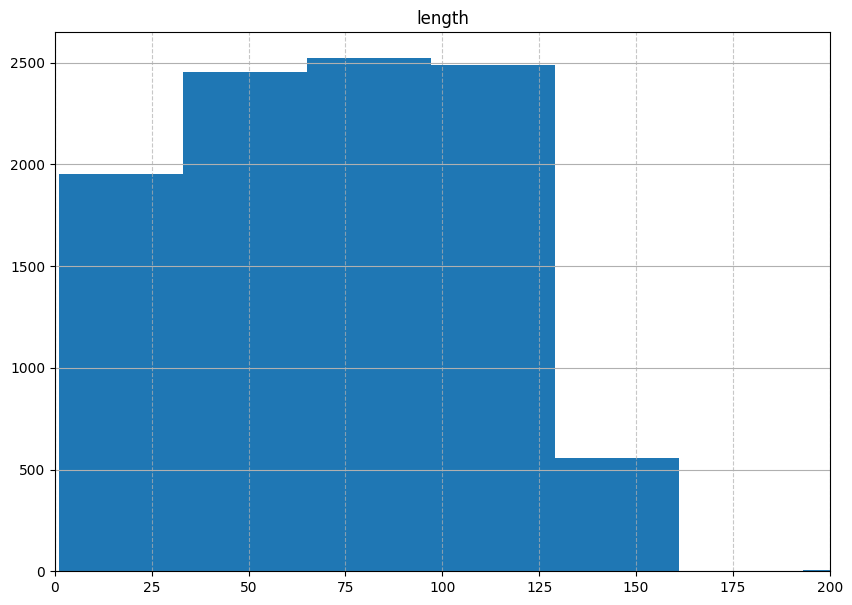

In [193]:
data['length'] = data['text'].map(lambda x: len(x))
data.hist(column='length', figsize=(10,7), bins=100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 200)

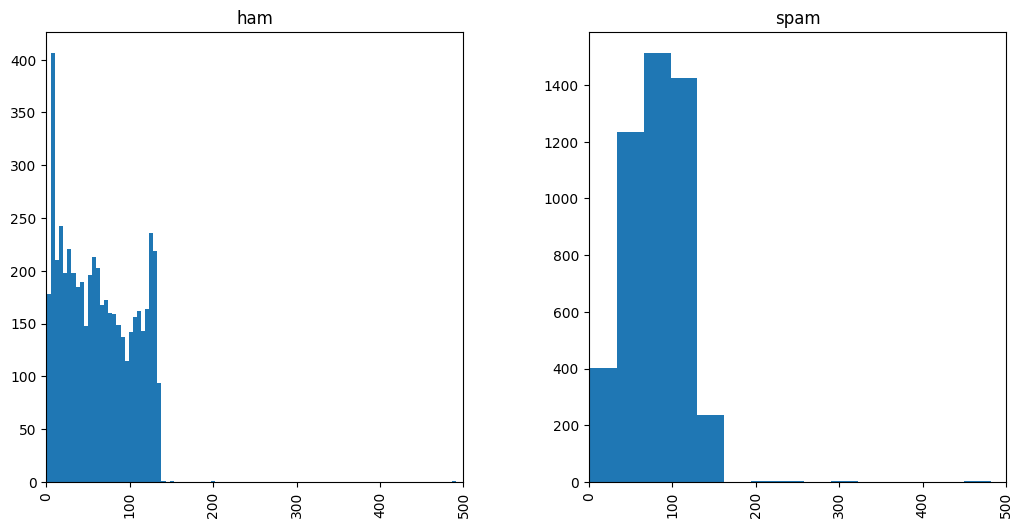

In [165]:
import matplotlib.pyplot as plt

axes = data.hist(column='length', by='label', figsize=(12,6), bins=100)

# Apply xlim to each subplot
for ax in np.ravel(axes):  # Flatten the subplot array
    ax.set_xlim(0, 500)

plt.show()


In [166]:
import nltk 
# nltk.download("punkt")
import warnings
warnings.filterwarnings('ignore')

In [167]:
ham_words = ''
spam_words = ''

In [168]:
for val in data[data['label'] == 'spam'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '

for val in data[data['label'] == 'ham'].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [169]:
ham_words[:100]

'a way for entrepreneurial students to share their idea like bacon salt hello world welcome to afford'

In [170]:
spam_wordcloud = WordCloud(width=500, height=300).generate(spam_words)
ham_wordcloud = WordCloud(width=500, height=300).generate(ham_words)

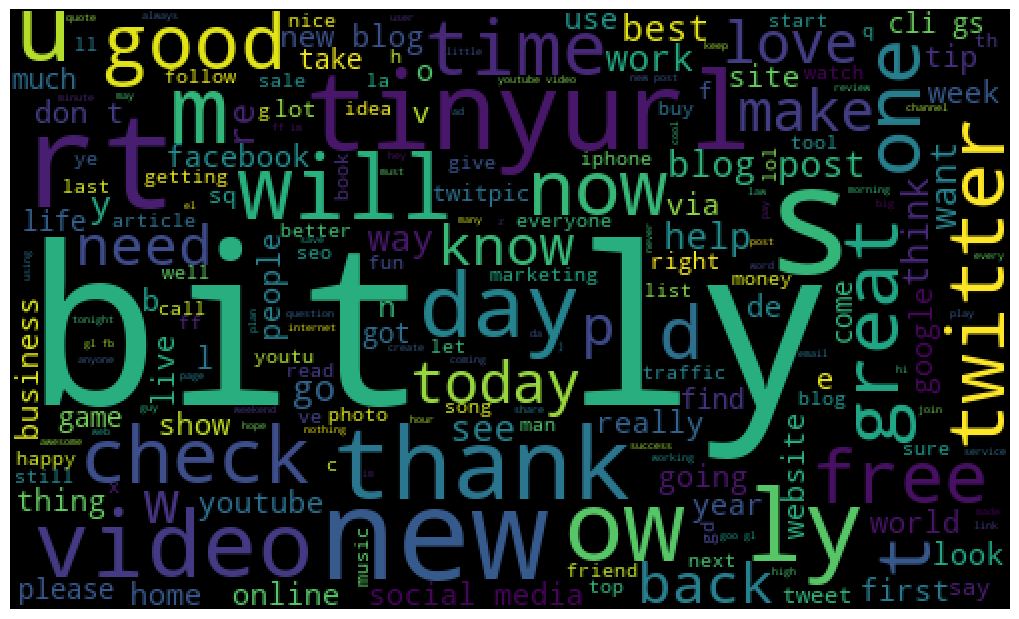

In [171]:
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

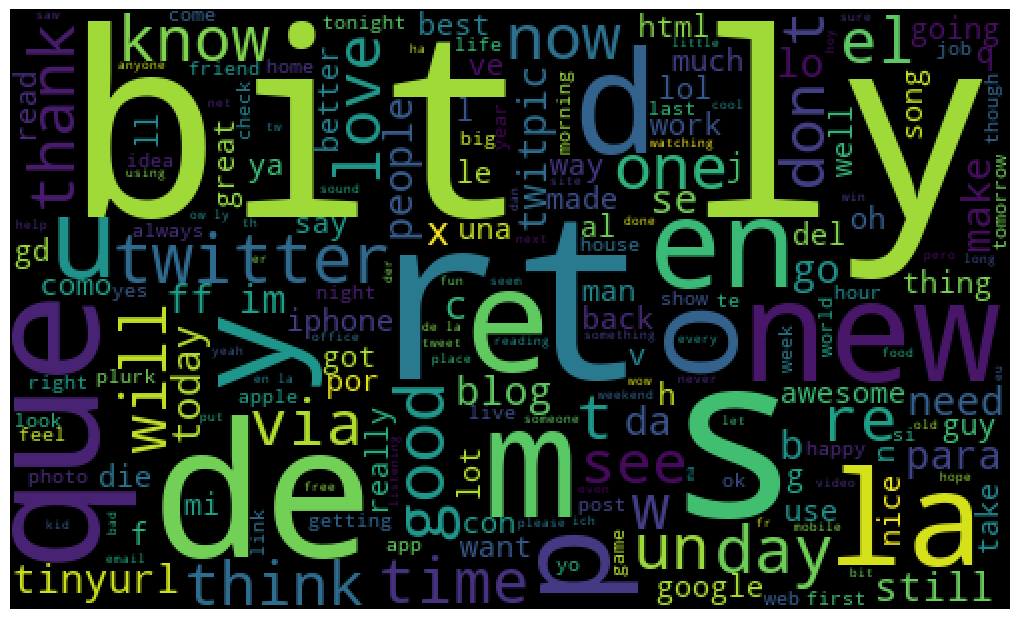

In [172]:
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [173]:
data = data.replace(['ham','spam'],[0, 1])
data.head(10)

,text,label,length
0,a way for entrepreneurial students to share th...,0,70
1,Just back from the UK thanks positiveparents w...,1,103
2,Totally unexpected great night,1,30
3,bodysculpter hi will email u in the morning I ...,1,122
4,Hello world Welcome to Affordable Web Pro Blog...,0,63
5,Best Quit Smoking Philadelphia Pa NJ Hypnosis ...,1,76
6,Telular Corporation Reports Fourth Quarter and...,1,84
7,Reading Finde den Unterschied Zeit Online vs P...,1,81
8,Checking out RT joshuaziering Easy AB Split Te...,1,88
9,or,0,2


In [174]:
import string

In [175]:
text = pd.DataFrame(data['text'])
label = pd.DataFrame(data['label'])

In [176]:
##counting how many times a word appears in the dataset

from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in str(text.values[i][0]).split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  32382


In [177]:
## sorting in decreasing order
# 
# vocab = sorted(total_counts, key=total_counts.get, reverse=True)
# print(vocab[:60]) 

In [178]:
## mapping from words to index

# vocab_size = len(vocab)
# word2idx ={}
# #print vocab_size

# for i, word in enumerate(vocab):
#     word2idx[word] = i

In [179]:
# ##text to vector
# def text_to_vector(text):
#     word_vector = np.zeros(vocab_size)
#     for word in text.split(" "):
#         if word2idx.get(word) is None:
#             continue
#         else:
#             word_vector[word2idx.get(word)] += 1
#     return np.array(word_vector)

In [180]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=50000)

In [181]:
from nltk.stem import PorterStemmer
from nltk.stem.porter import PorterStemmer
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    ps = PorterStemmer() 
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [182]:
data['transformed_text'] = data['text'].astype(str).apply(transform_text)


In [183]:
spam_corpus = []
for msg in data[data['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

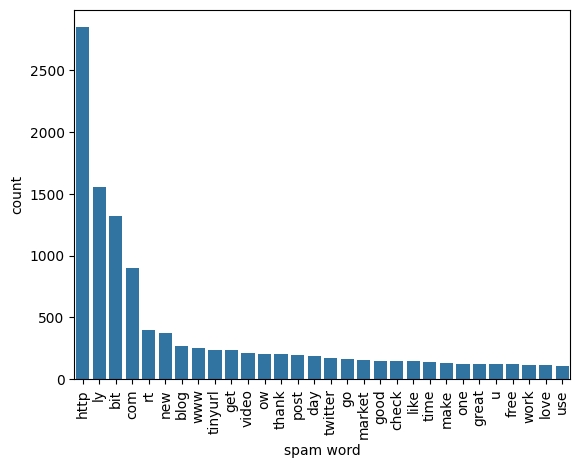

In [184]:
from collections import Counter
import seaborn as sns
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['spam word', 'count'])
sns.barplot(x='spam word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [185]:
ham_corpus = []
for msg in data[data['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

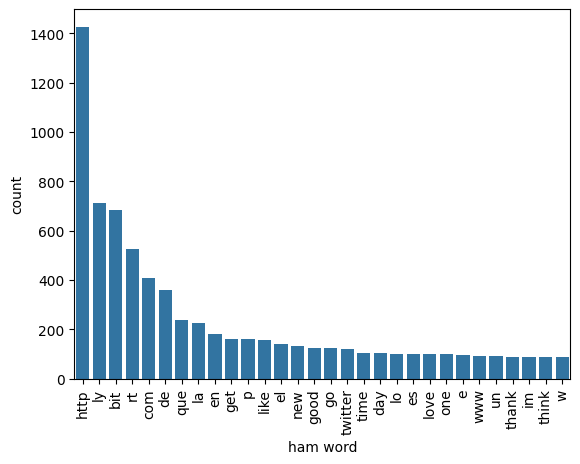

In [186]:
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['ham word', 'count'])
sns.barplot(x='ham word', y='count', data=most_common_words)
plt.xticks(rotation='vertical')
plt.show()

In [187]:
X = tfidf.fit_transform(data['transformed_text']).toarray()
X.shape

(10000, 23234)

In [188]:
y=data['label'].values

In [189]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)